In [1]:
pip install flask pandas numpy scikit-learn pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyspark kafka-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load datasets
users_df = pd.read_csv("users (1).csv")
courses_df = pd.read_csv("courses_v2.csv")
enrollments_df = pd.read_csv("interactions.csv")
interactions_df = pd.read_csv("reviews.csv")
logs_df = pd.read_csv("active_logs.csv")

# Display first few rows of each dataset
print("Users Data:")
print(users_df.head(), "\n")

print("Courses Data:")
print(courses_df.head(), "\n")

print("Enrollments Data:")
print(enrollments_df.head(), "\n")

print("Interactions Data:")
print(interactions_df.head(), "\n")

print("Active Logs Data:")
print(logs_df.head(), "\n")

Users Data:
   user_id               name  age gender education_level  \
0        1   Dr. Amanda Ellis   30   Male        Master’s   
1        2        Julie Jones   56   Male      Bachelor’s   
2        3  Jennifer Mcdonald   59  Other      Bachelor’s   
3        4    Kayla Henderson   59   Male     High School   
4        5    Robin Schneider   37  Other      Bachelor’s   

                   preferred_subjects signup_date last_active_date  
0  ['Programming', 'Science', 'Math']  13-04-2023       21-11-2024  
1                  ['Art', 'History']  11-06-2024       14-11-2024  
2          ['Programming', 'Science']  14-05-2023       19-06-2024  
3                         ['History']  16-02-2024       25-10-2024  
4                         ['History']  22-09-2024       25-06-2024   

Courses Data:
  course_id     title      category    difficulty  rating
0        C2  Course 2          Math  Intermediate     4.8
1        C5  Course 5  Data Science      Advanced     3.5
2        C6  Cour

In [4]:
import pandas as pd

# Load datasets
users_df = pd.read_csv("users (1).csv")
courses_df = pd.read_csv("courses_v2.csv")
enrollments_df = pd.read_csv("interactions.csv")
interactions_df = pd.read_csv("reviews.csv")
logs_df = pd.read_csv("active_logs.csv")

# Handling missing values
users_df.fillna({'age': users_df['age'].median(), 'gender': 'Unknown'}, inplace=True)
courses_df.fillna({'difficulty': 'Unknown', 'rating': courses_df['rating'].median()}, inplace=True)
enrollments_df.dropna(inplace=True)  # Remove incomplete enrollments
interactions_df.fillna({'rating': interactions_df['rating'].median()}, inplace=True)
logs_df.dropna(inplace=True)

# Convert data types if needed
users_df['age'] = users_df['age'].astype(int)
courses_df['rating'] = courses_df['rating'].astype(float)
interactions_df['rating'] = interactions_df['rating'].astype(float)

# Remove duplicates
users_df.drop_duplicates(inplace=True)
courses_df.drop_duplicates(inplace=True)
enrollments_df.drop_duplicates(inplace=True)
interactions_df.drop_duplicates(inplace=True)
logs_df.drop_duplicates(inplace=True)

# Normalize categorical values
users_df['gender'] = users_df['gender'].map({'Male': 0, 'Female': 1, 'Unknown': 2})

# Standardize text-based fields
courses_df['title'] = courses_df['title'].str.lower()
users_df['name'] = users_df['name'].str.lower()
courses_df['category'] = courses_df['category'].str.lower()
courses_df['difficulty'] = courses_df['difficulty'].str.lower()
print("✅ Data cleaning complete!")


✅ Data cleaning complete!


Dataset Sizes:
Users: (1000, 8)
Courses: (495, 5)
Enrollments: (5000, 4)
Interactions: (2000, 4)
Active Logs: (3527, 5)

Unique Users: 1000
Unique Courses: 495


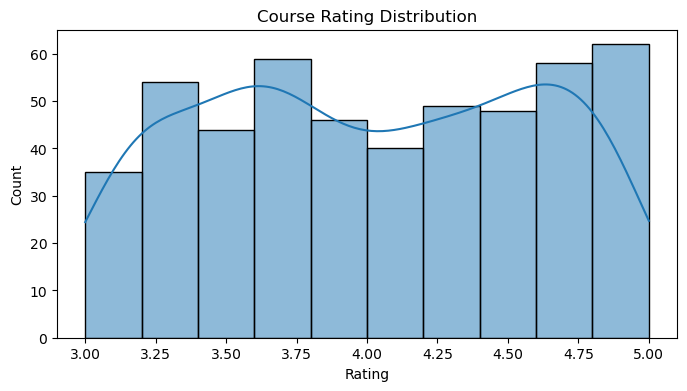

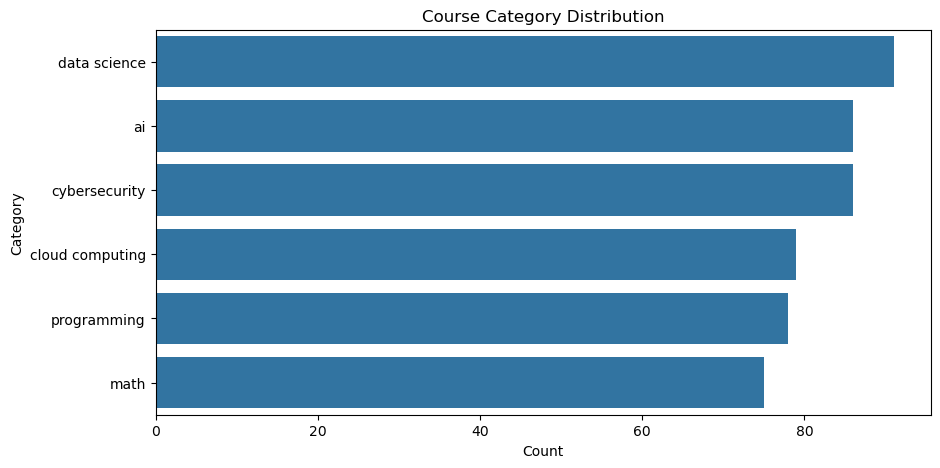

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset sizes
print("Dataset Sizes:")
print(f"Users: {users_df.shape}")
print(f"Courses: {courses_df.shape}")
print(f"Enrollments: {enrollments_df.shape}")
print(f"Interactions: {interactions_df.shape}")
print(f"Active Logs: {logs_df.shape}")

# Check unique values
print("\nUnique Users:", users_df['user_id'].nunique())
print("Unique Courses:", courses_df['course_id'].nunique())

# Check rating distribution
plt.figure(figsize=(8, 4))
sns.histplot(courses_df['rating'], bins=10, kde=True)
plt.title("Course Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Check category distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=courses_df['category'], order=courses_df['category'].value_counts().index)
plt.title("Course Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

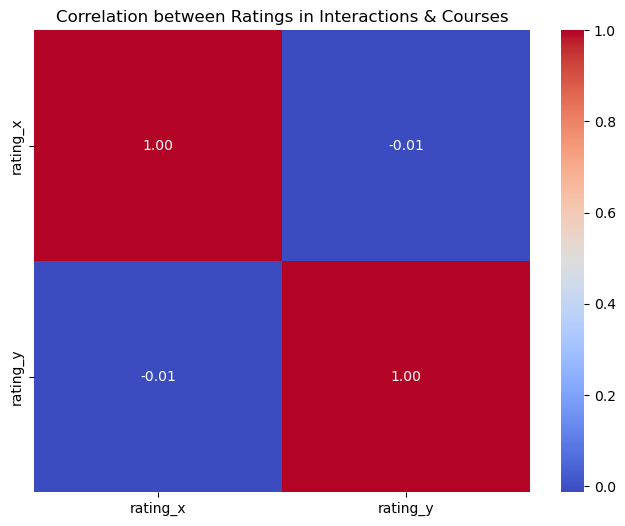

In [6]:
# Merge interactions with courses
merged_df = interactions_df.merge(courses_df, on="course_id", how="left")

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['rating_x', 'rating_y']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Ratings in Interactions & Courses")
plt.show()

In [7]:
# Aggregate user interactions to get average rating per course
course_ratings = interactions_df.groupby("course_id")["rating"].mean().reset_index()
course_ratings.columns = ["course_id", "avg_rating"]

# Count number of interactions per course (engagement level)
course_engagement = interactions_df.groupby("course_id")["user_id"].count().reset_index()
course_engagement.columns = ["course_id", "num_interactions"]

# Merge with courses dataset
courses_df = courses_df.merge(course_ratings, on="course_id", how="left")
courses_df = courses_df.merge(course_engagement, on="course_id", how="left")

# Fill missing values with 0
courses_df["avg_rating"].fillna(0, inplace=True)
courses_df["num_interactions"].fillna(0, inplace=True)

# Display updated course data
print(courses_df.head())

  course_id     title      category    difficulty  rating  avg_rating  \
0        C2  course 2          math  intermediate     4.8    2.900000   
1        C5  course 5  data science      advanced     3.5    2.966667   
2        C6  course 6   programming      advanced     4.7    2.971429   
3        C7  course 7  data science  intermediate     4.2    3.428571   
4        C8  course 8            ai      advanced     4.6    3.000000   

   num_interactions  
0               4.0  
1               3.0  
2               7.0  
3               7.0  
4               4.0  


C:\Users\Allamsetti\AppData\Local\Temp\ipykernel_1360\1070086159.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  courses_df["avg_rating"].fillna(0, inplace=True)
C:\Users\Allamsetti\AppData\Local\Temp\ipykernel_1360\1070086159.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [8]:
# Count how many courses each user has enrolled in per category
user_category_preferences = enrollments_df.merge(courses_df, on="course_id", how="left")
user_category_preferences = user_category_preferences.groupby(["user_id", "category"])["course_id"].count().reset_index()
user_category_preferences.columns = ["user_id", "category", "num_courses_enrolled"]

# Display user preferences
print(user_category_preferences.head())

  user_id         category  num_courses_enrolled
0      U1  cloud computing                     1
1      U1             math                     3
2      U1      programming                     1
3     U10               ai                     1
4     U10  cloud computing                     1


In [9]:
# Count user visits per course category
user_activity = logs_df.merge(courses_df, on="course_id", how="left")
user_activity = user_activity.groupby(["user_id", "category"])["timestamp"].count().reset_index()
user_activity.columns = ["user_id", "category", "activity_count"]

# Display user activity trends
print(user_activity.head())

  user_id       category  activity_count
0      U1    programming               1
1     U10           math               1
2    U100   data science               1
3    U100    programming               1
4    U101  cybersecurity               2


In [10]:
# Merge user category preferences with user activity
user_profiles = user_category_preferences.merge(user_activity, on=["user_id", "category"], how="outer")
user_profiles.fillna(0, inplace=True)

# Display user profiles
print(user_profiles.head())

  user_id         category  num_courses_enrolled  activity_count
0      U1  cloud computing                   1.0             0.0
1      U1             math                   3.0             0.0
2      U1      programming                   1.0             1.0
3     U10               ai                   1.0             0.0
4     U10  cloud computing                   1.0             0.0


In [11]:
from scipy.sparse import csr_matrix

# Ensure no duplicate (user_id, course_id) pairs by averaging ratings
interactions_df = interactions_df.groupby(["user_id", "course_id"], as_index=False).agg({"rating": "mean"})

# Create user-course matrix after handling duplicates
user_course_matrix = interactions_df.pivot(index="user_id", columns="course_id", values="rating").fillna(0)

# Convert to a sparse matrix for efficiency
user_course_sparse = csr_matrix(user_course_matrix.values)

print(f"User-Course Matrix Shape: {user_course_matrix.shape}")

User-Course Matrix Shape: (873, 490)


In [12]:
# Print first few user IDs in our dataset
print("Available User IDs:", user_course_matrix.index[:10].tolist())

# Check if the requested user_id exists
test_user_id = "U120"  # Replace with any user ID you're testing
if test_user_id in user_course_matrix.index:
    print(f"User {test_user_id} exists!")
else:
    print(f"User {test_user_id} NOT FOUND!")

Available User IDs: ['U1', 'U10', 'U100', 'U1000', 'U101', 'U102', 'U103', 'U104', 'U105', 'U106']
User U120 exists!


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine relevant columns into a single text column
courses_df["combined_features"] = (
    courses_df["title"].astype(str) + " " +
    courses_df["category"].astype(str) + " " +
    courses_df["difficulty"].astype(str)
)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Transform combined text features into a matrix
tfidf_matrix = tfidf.fit_transform(courses_df["combined_features"])

# Compute cosine similarity between courses
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend courses based on a given course
def recommend_similar_courses(course_id, num_recommendations=10):
    if course_id not in courses_df["course_id"].values:
        return "Course not found!"
    
    # Get the index of the given course
    course_index = courses_df[courses_df["course_id"] == course_id].index[0]
    
    # Get similarity scores with all courses
    sim_scores = list(enumerate(cosine_sim[course_index]))
    
    # Sort courses based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    
    # Get recommended course indices
    recommended_indices = [i[0] for i in sim_scores]
    
    # Return recommended course details
    return courses_df.iloc[recommended_indices][["course_id", "title", "category", "difficulty"]]

# Test recommendation for a course
print(recommend_similar_courses("C15"))  # Change the course_id to test different courses

    course_id       title       category    difficulty
5          C9    course 9  cybersecurity  intermediate
12        C16   course 16  cybersecurity  intermediate
35        C39   course 39  cybersecurity  intermediate
67        C71   course 71  cybersecurity  intermediate
87        C91   course 91  cybersecurity  intermediate
89        C93   course 93  cybersecurity  intermediate
103      C107  course 107  cybersecurity  intermediate
116      C120  course 120  cybersecurity  intermediate
127      C131  course 131  cybersecurity  intermediate
189      C195  course 195  cybersecurity  intermediate


 Explanation of Hybrid Model
User-Based Filtering (KNN)

Finds users similar to the target user.
Recommends courses based on what similar users have taken.
Content-Based Filtering

Looks at the courses the user has already taken.
Finds similar courses based on title, category, and difficulty.
Final Step

Combines recommendations from both methods.
Removes duplicates and ranks the most relevant courses.

In [15]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Convert to a sparse matrix (for efficiency)
user_course_sparse = csr_matrix(user_course_matrix.values)

# Train KNN Model for User-Based Recommendations
knn_model = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)
knn_model.fit(user_course_sparse)

# ------------------- Content-Based Filtering -------------------

# Combine relevant course details
courses_df["combined_features"] = (
    courses_df["title"].astype(str) + " " +
    courses_df["category"].astype(str) + " " +
    courses_df["difficulty"].astype(str)
)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(courses_df["combined_features"])

# Compute cosine similarity between courses
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# ------------------- Hybrid Recommendation Function -------------------

def hybrid_recommendations(user_id, num_recommendations=5):
    # ----------------- Step 1: User-Based Filtering -----------------
    if user_id not in user_course_matrix.index:
        return "User not found!"
    
    user_index = user_course_matrix.index.get_loc(user_id)
    distances, indices = knn_model.kneighbors(user_course_sparse[user_index], n_neighbors=6)  # Including self

    # Get similar users (excluding the first one, which is the user itself)
    similar_users = user_course_matrix.iloc[indices.flatten()[1:]]
    
    # Find top-rated courses from similar users
    user_based_recommendations = similar_users.mean().sort_values(ascending=False).head(num_recommendations)
    
    # ----------------- Step 2: Content-Based Filtering -----------------
    user_courses = interactions_df[interactions_df["user_id"] == user_id]["course_id"].values
    content_recommendations = []
    
    for course_id in user_courses:
        if course_id in courses_df["course_id"].values:
            course_index = courses_df[courses_df["course_id"] == course_id].index[0]
            sim_scores = list(enumerate(cosine_sim[course_index]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
            recommended_indices = [i[0] for i in sim_scores]
            content_recommendations.extend(courses_df.iloc[recommended_indices]["course_id"].values)
    
    # ----------------- Step 3: Combine & Rank Results -----------------
    final_recommendations = list(set(user_based_recommendations.index).union(set(content_recommendations)))
    
    return courses_df[courses_df["course_id"].isin(final_recommendations)][["course_id", "title", "category", "difficulty"]]

# Test the Hybrid Recommendation System
print(hybrid_recommendations("U1"))  # Change user_id for different recommendations

    course_id       title       category    difficulty
5          C9    course 9  cybersecurity  intermediate
13        C17   course 17  cybersecurity      advanced
25        C29   course 29  cybersecurity      advanced
28        C32   course 32  cybersecurity      advanced
34        C38   course 38  cybersecurity      advanced
156      C162  course 162   data science      beginner
176      C182  course 182   data science  intermediate
227      C233  course 233  cybersecurity      advanced
313      C319  course 319             ai  intermediate
493      C499  course 499           math  intermediate


In [16]:
def evaluate_recommendations(test_users, model, num_recommendations=5):
    actual_ratings = []
    predicted_ratings = []

    for user_id in test_users:
        if user_id not in user_course_matrix.index:
            print(f"Skipping user {user_id}: User not found!")
            continue

        # Get actual ratings given by the user
        user_ratings = interactions_df[interactions_df["user_id"] == user_id][["course_id", "rating"]]

        # Get recommended courses
        recommended_courses = recommend_courses_for_user(user_id, num_recommendations)

        # ✅ FIX: Ensure it’s a list before checking if empty
        if not isinstance(recommended_courses, list) or len(recommended_courses) == 0:
            print(f"No recommendations found for user {user_id}. Skipping...")
            continue

        # Compare actual vs predicted ratings
        for rec in recommended_courses:
            course_id = rec["course_id"]
            predicted_rating = rec["rating"]

            if course_id in user_ratings["course_id"].values:
                actual_rating = user_ratings[user_ratings["course_id"] == course_id]["rating"].values[0]

                actual_ratings.append(actual_rating)
                predicted_ratings.append(predicted_rating)

    # Compute MAE and RMSE if there are valid ratings
    if len(actual_ratings) > 0:
        mae = mean_absolute_error(actual_ratings, predicted_ratings)
        rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)
    else:
        mae, rmse = "N/A", "N/A"
        print("No valid ratings found for evaluation.")

    return {"MAE": mae, "RMSE": rmse}

In [17]:
def recommend_courses_for_user(user_id, num_recommendations=5):
    if user_id not in user_course_matrix.index:
        print(f"User {user_id} not found in user-course matrix.")
        return []

    # Find similar users using KNN
    try:
        user_idx = list(user_course_matrix.index).index(user_id)
        distances, indices = knn_model.kneighbors(user_course_matrix.iloc[user_idx, :].values.reshape(1, -1))
    except Exception as e:
        print(f"Error finding neighbors for user {user_id}: {e}")
        return []

    similar_users = user_course_matrix.index[indices.flatten()[1:]]  # Exclude the user itself

    if len(similar_users) == 0:
        print(f"No similar users found for user {user_id}.")
        return []

    # Get courses that similar users have interacted with
    similar_users_data = interactions_df[interactions_df["user_id"].isin(similar_users)]
    recommended_courses = similar_users_data.groupby("course_id")["rating"].mean().reset_index()

    if recommended_courses.empty:
        print(f"No course recommendations found for user {user_id}.")
        return []

    # Convert to list of dictionaries for consistency
    return recommended_courses.to_dict(orient="records")

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

valid_users = interactions_df["user_id"].unique()  # Get all unique users
test_users = np.random.choice(valid_users, size=min(1000, len(valid_users)), replace=False)  

evaluation_results = evaluate_recommendations(test_users, knn_model)
print("Final Evaluation Results:", evaluation_results)

Final Evaluation Results: {'MAE': 1.0823002754820936, 'RMSE': 1.3270027702148715}


C:\Users\Allamsetti\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
print("Sample user IDs in dataset:", user_course_matrix.index[:10])  # Check first 10 users
print("Data type of index:", type(user_course_matrix.index[0]))  # Check type of user IDs

Sample user IDs in dataset: Index(['U1', 'U10', 'U100', 'U1000', 'U101', 'U102', 'U103', 'U104', 'U105',
       'U106'],
      dtype='object', name='user_id')
Data type of index: <class 'str'>


In [20]:
print("User ID U95 exists in index:", "U95" in user_course_matrix.index)
print("User ID list sample:", list(user_course_matrix.index)[:10])  # Print first 10 user IDs

User ID U95 exists in index: False
User ID list sample: ['U1', 'U10', 'U100', 'U1000', 'U101', 'U102', 'U103', 'U104', 'U105', 'U106']


In [21]:
def test_knn_recommender(user_id, knn_model, user_course_matrix, n_recommendations=5):
    """
    Tests the KNN recommendation model for a given user.
    """
    # Convert user_id to string to match dataset
    user_id = str(user_id)

    # Check if user exists
    if user_id not in user_course_matrix.index:
        print(f"User {user_id} NOT FOUND in dataset!")
        return []

    print(f"User {user_id} FOUND! Generating recommendations...")

    # Get the user's interaction vector
    user_vector = user_course_matrix.loc[user_id].values.reshape(1, -1)

    # Find nearest neighbors
    distances, indices = knn_model.kneighbors(user_vector, n_neighbors=n_recommendations+1)

    # Get similar users (excluding the user itself)
    similar_users = user_course_matrix.iloc[indices.flatten()[1:]].index

    # Aggregate top recommendations from similar users
    recommended_items = set()
    for neighbor in similar_users:
        neighbor_rated_items = user_course_matrix.loc[neighbor][user_course_matrix.loc[neighbor] > 0].index
        recommended_items.update(neighbor_rated_items)

    # Filter out items the user has already interacted with
    user_rated_items = user_course_matrix.loc[user_id][user_course_matrix.loc[user_id] > 0].index
    final_recommendations = list(set(recommended_items) - set(user_rated_items))

    return final_recommendations[:n_recommendations]

# Example Usage:
user_id_to_test = "U100"  # Ensure the format matches the dataset
recommended_items = test_knn_recommender(user_id_to_test, knn_model, user_course_matrix, n_recommendations=5)
print(f"Recommended items for user {user_id_to_test}: {recommended_items}")

User U100 FOUND! Generating recommendations...
Recommended items for user U100: ['C36', 'C286', 'C90', 'C453', 'C2']


In [22]:
test_users = ["U105", "U120", "U510", "U950"]  # Change these as per your dataset
for user in test_users:
    recommended_items = test_knn_recommender(user, knn_model, user_course_matrix, n_recommendations=7)
    print(f"Recommended items for user {user}: {recommended_items}")

User U105 FOUND! Generating recommendations...
Recommended items for user U105: ['C80', 'C33', 'C331', 'C311', 'C329', 'C238', 'C362']
User U120 FOUND! Generating recommendations...
Recommended items for user U120: ['C430', 'C473', 'C479', 'C96', 'C465', 'C383', 'C252']
User U510 FOUND! Generating recommendations...
Recommended items for user U510: ['C11', 'C148', 'C416', 'C7', 'C481', 'C384', 'C178']
User U950 FOUND! Generating recommendations...
Recommended items for user U950: ['C203', 'C392', 'C332', 'C49', 'C162', 'C82', 'C359']


In [26]:
import os
import joblib

# Define file path
directory = "C:\\cds"
file_path = os.path.join(directory, "knn_model.pkl")

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Save the model
joblib.dump(knn_model, file_path)
print("✅ Model saved successfully using Joblib!")
print("✅ Model loaded successfully using Joblib!")

✅ Model saved successfully using Joblib!
✅ Model loaded successfully using Joblib!


In [28]:
import pandas as pd

# Load your original dataset (modify the path if needed)
interactions_df = pd.read_csv("interactions.csv")  # Replace with your actual dataset file

# Check for duplicates
print(interactions_df.duplicated(subset=["user_id", "course_id"]).sum(), "duplicates found.")

# Remove duplicates by averaging the ratings (or choose another aggregation method)
interactions_df = interactions_df.groupby(["user_id", "course_id"], as_index=False)["rating_given"].mean()

# Pivot the dataset to create a user-course interaction matrix
user_course_matrix = interactions_df.pivot(index="user_id", columns="course_id", values="rating_given").fillna(0)

# Re-train KNN on current matrix (500 features)
knn_model.fit(user_course_matrix.values)

# Save to CSV
user_course_matrix.to_csv("user_course_matrix.csv")
print("✅ User-course matrix generated and saved as 'user_course_matrix.csv'")

23 duplicates found.
✅ User-course matrix generated and saved as 'user_course_matrix.csv'


In [30]:
# Print column names for each dataset
print("Users Data Columns:", users_df.columns.tolist())
print("Courses Data Columns:", courses_df.columns.tolist())
print("Enrollments Data Columns:", enrollments_df.columns.tolist())
print("Interactions Data Columns:", interactions_df.columns.tolist())
print("Active Logs Data Columns:", logs_df.columns.tolist())

Users Data Columns: ['user_id', 'name', 'age', 'gender', 'education_level', 'preferred_subjects', 'signup_date', 'last_active_date']
Courses Data Columns: ['course_id', 'title', 'category', 'difficulty', 'rating', 'avg_rating', 'num_interactions', 'combined_features']
Enrollments Data Columns: ['user_id', 'course_id', 'interaction_type', 'rating_given']
Interactions Data Columns: ['user_id', 'course_id', 'rating_given']
Active Logs Data Columns: ['timestamp', 'user_id', 'action', 'course_id', 'system_response']


In [32]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Train on current sparse matrix (873 users × 490 courses)
knn_model = NearestNeighbors(metric="cosine", algorithm="brute")
knn_model.fit(user_course_sparse)  # This is your csr_matrix from user_course_matrix.values

NearestNeighbors(algorithm='brute', metric='cosine')

In [34]:
import joblib
joblib.dump(knn_model, "knn_model_490.pkl")
print("Model printed successfully")

Model printed successfully


In [36]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import pickle

# Assuming user_course_matrix is 500-feature wide now
user_course_sparse = csr_matrix(user_course_matrix.values)

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_course_sparse)

# Save again
with open("knn_model_500.pkl", "wb") as f:
    pickle.dump(knn_model, f)

# Also save the course columns
with open("trained_course_columns.pkl", "wb") as f:
    pickle.dump(user_course_matrix.columns.tolist(), f)

In [40]:
import joblib
import pandas as pd
from scipy.sparse import csr_matrix

# === Step 1: Load model
knn_model = joblib.load("knn_model_500.pkl")
print("✅ Model loaded successfully!")

# === Step 2: Load or prepare your user-course matrix
# Replace this with your real `interactions_df`
# Assuming you already have the interactions_df prepared:

# Ensure no duplicate (user_id, course_id) pairs by averaging ratings
interactions_df = interactions_df.groupby(["user_id", "course_id"], as_index=False).agg({"rating_given": "mean"})

# Create user-course matrix
user_course_matrix = interactions_df.pivot(index="user_id", columns="course_id", values="rating_given").fillna(0)

# Create sparse matrix
user_course_sparse = csr_matrix(user_course_matrix.values)

# === Step 3: Define recommender testing function
def test_knn_recommender(user_id, knn_model, user_course_matrix, n_recommendations=5):
    """
    Test the KNN recommendation model for a specific user_id.
    """
    user_id = str(user_id)

    if user_id not in user_course_matrix.index:
        print(f"❌ User {user_id} NOT FOUND in dataset!")
        return []

    print(f"✅ User {user_id} FOUND! Generating recommendations...")

    # Get user interaction vector
    user_vector = user_course_matrix.loc[user_id].values.reshape(1, -1)

    # Use the loaded model to find nearest neighbors
    distances, indices = knn_model.kneighbors(user_vector, n_neighbors=n_recommendations + 1)

    # Get similar users (excluding the user itself)
    similar_users = user_course_matrix.iloc[indices.flatten()[1:]].index

    # Collect recommended courses from similar users
    recommended_courses = set()
    for neighbor in similar_users:
        neighbor_courses = user_course_matrix.loc[neighbor][user_course_matrix.loc[neighbor] > 0].index
        recommended_courses.update(neighbor_courses)

    # Filter out already rated courses
    user_courses = user_course_matrix.loc[user_id][user_course_matrix.loc[user_id] > 0].index
    final_recommendations = list(set(recommended_courses) - set(user_courses))

    return final_recommendations[:n_recommendations]

# === Step 4: Test with a real user_id
user_id_to_test = "U100"  # Change to one from your dataset
recommendations = test_knn_recommender(user_id_to_test, knn_model, user_course_matrix, n_recommendations=5)

print(f"\n🎯 Recommendations for {user_id_to_test}:")
print(recommendations if recommendations else "No new courses to recommend.")

✅ Model loaded successfully!
✅ User U100 FOUND! Generating recommendations...

🎯 Recommendations for U100:
['C381', 'C446', 'C268', 'C212', 'C107']
